The role of a namespace is like a surname. We might not find a single "Deepa" in the class there might be multiple "Deepa" but when we particularly ask for "Deepa Nair" or "Deepa Shetty" (with a surname), there will be only one.

Thus, when we deal with variables, functions, libraries and modules there is a chance the name of the variable we are going to use is already existing as name of another variable or as the name of another function or another method. In such scenario, we need to learn about how all these names are managed by a python program. This is the concept of namespace.

Its Name (which means name, a unique identifier) + Space(which talks something related to scope). Here, a name might be of any Python method or variable and space depends upon the location from where is trying to access a variable or a method.

- A namespace is a collection of names and the details of the objects referenced by the names
- As we know that, everything in Python—like strings, lists, functions, etc.—is an object. 
- There is a name-to-object mapping, with the names as keys and the objects as values. 
- Multiple namespaces can use the same name and map it to a different object. Here are a few examples of namespaces
- Another interesting fact is that Python implements namespaces as dictionaries. 

##### Local Namespace: 
All the names of the functions and variables declared by a program are held in this namespace. This namespace exists as long as the program runs. < /p>

##### Global Namespace: 
This namespace holds all the names of functions and other variables that are included in the modules being used in the python program. It encompasses all the names that are part of the Local namespace.

##### Built-in Namespace: 
This is the highest level of namespace which is available with default names available as part of the python interpreter that is loaded as the programing environment. It encompasses Global Namespace which in turn encompasses the local namespace.

So, when we create a module, a global namespace gets created, later the creation of local functions creates the local namespace. The built-in namespace (e.g., print(), id() etc.) encompasses/ encircle the global namespace and the global namespace encompasses the local namespace.

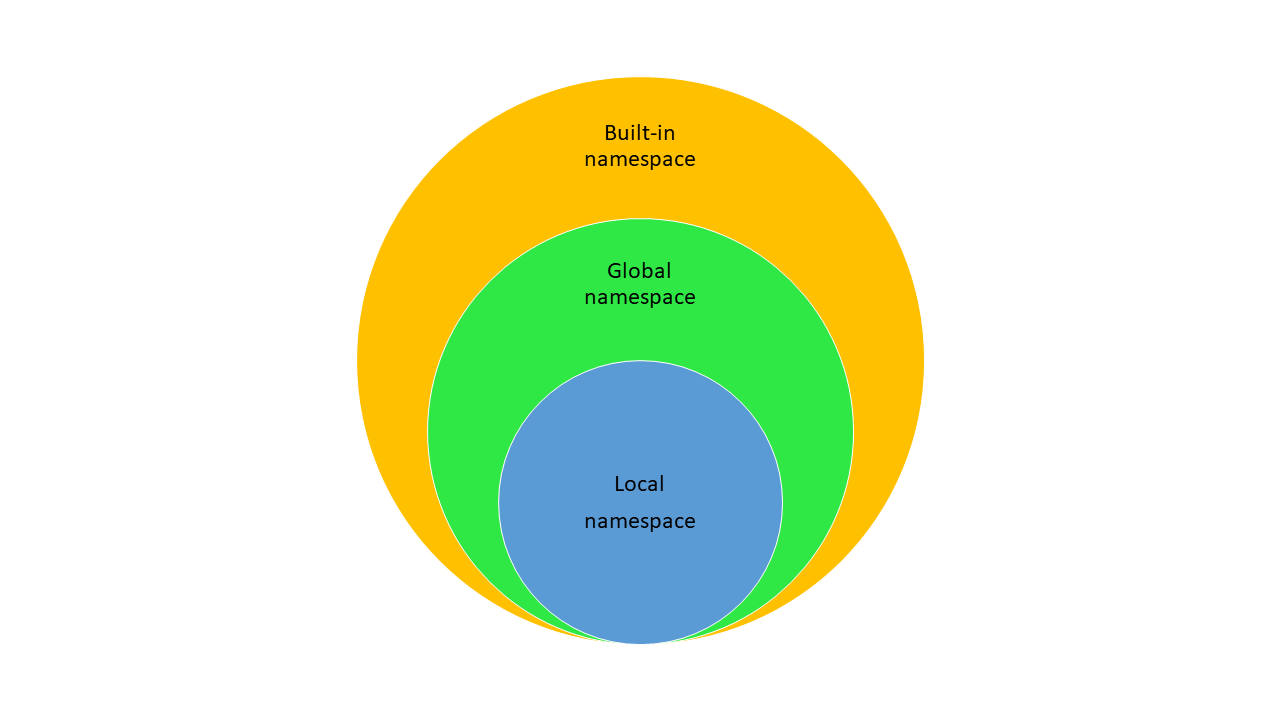

### Scope of NameSpace
- Namespaces help us uniquely identify all the names inside a program. 
- However, this doesn't imply that we can use a variable name anywhere we want. 
- A name also has a scope that defines the parts of the program where we could use that name without using any prefix. 
- There are also multiple scopes in a program. 

Below is a list of some scopes that can exist during the execution of a program.

- A local scope, which is the innermost scope that contains a list of local names available in the current function.
- A scope of all the enclosing functions. The search for a name starts from the nearest enclosing scope and moves outwards.
- A module level scope that contains all the global names from the current module.
- The outermost scope that contains a list of all the built-in names. This scope is searched last to find the name that you referenced. 

The search for a given name starts from the innermost function and then moves higher and higher until the program can map that name to an object. When no such name is found in any of the namespaces, the program raises a NameError exception.


In [1]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit']

All these names listed by dir() are available in every Python program. 

In [2]:
a_num = 10
dir()

def some_func():
    b_num = 11
    print(dir())
     
some_func()

print(dir())

['b_num']
['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'a_num', 'exit', 'get_ipython', 'quit', 'some_func']


- The dir() function only outputs the list of names inside the current scope. 
- That's why inside the scope of some_func(), there is only one name called b_num. 
- Calling dir() after defining some_func() adds it to the list of names available in the global namespace.

Now, let's see the list of names inside some nested functions. The code in this block continues from the previous block.

In [3]:
# var1 is in the global namespace
var1 = 5
def some_func():
 
    # var2 is in the local namespace
    var2 = 6
    def some_inner_func():
 
        # var3 is in the nested local namespace
        var3 = 7

As shown below, the same object name can be present in multiple namespaces as isolation between the same name is maintained by their namespace.

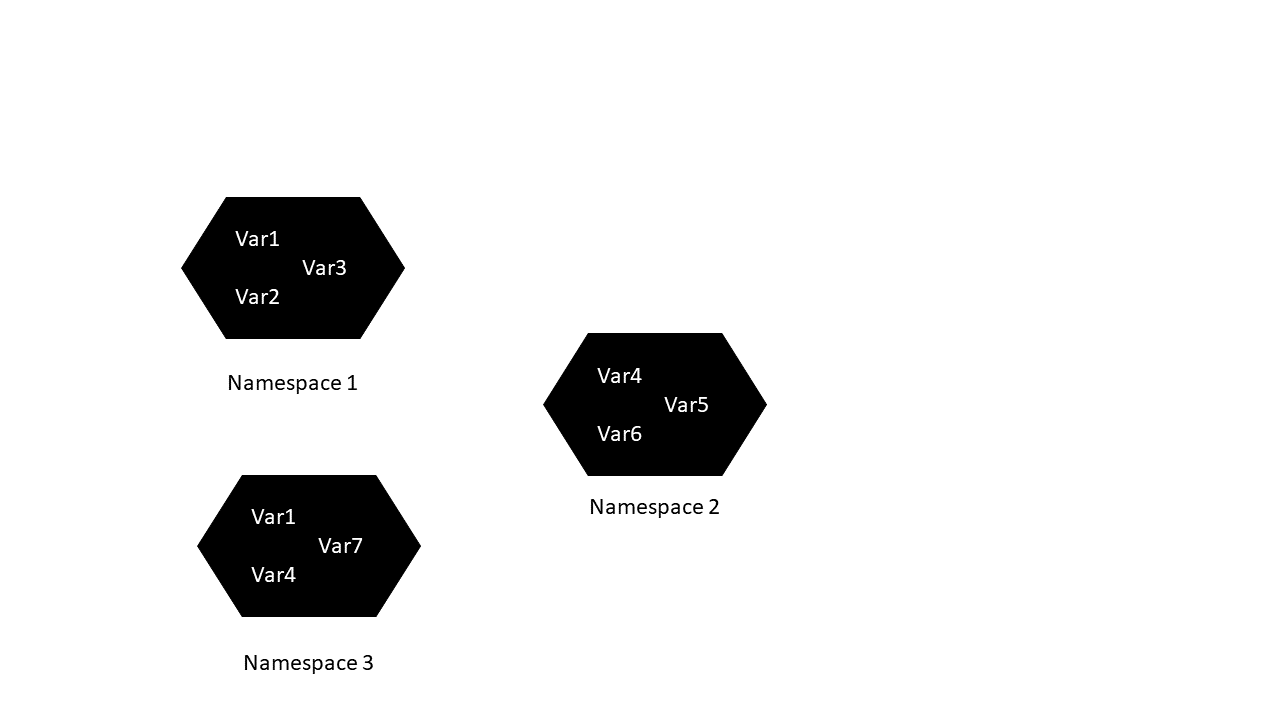

- But in some cases, we might be interested in updating or processing global variables only, as in below code block, we should mark it explicitly as global and the update or process.   
- here the line < count = count +1 > references the global variable and therefore uses the global variable, but compare this to the same line written < count = 1 >.  
- Then the line < global count > is absolutely needed according to scope rules.

In [4]:
# Python program processing global variable
 
count = 5
def some_method():
    global count
    count = count + 1
    print(count)

some_method()

6


In [4]:
def outer_func():
    c_num = 12
    def inner_func():
        d_num = 13
        print(dir(), ' - names in inner_func')
    e_num = 14
    inner_func()
    print(dir(), ' - names in outer_func')
     
outer_func()


['d_num']  - names in inner_func
['c_num', 'e_num', 'inner_func']  - names in outer_func


- The above code defines two variables and a function inside the scope of outer_func(). 
- Inside inner_func(), the dir() function only prints the name d_num. 
- d_num is the only variable defined in there.

Unless explicitly specified by using global, reassigning a global name inside a local namespace creates a new local variable with the same name. 

In [5]:
a_num = 10
b_num = 11
 
def outer_func():
    global a_num
    a_num = 15
    b_num = 16
    def inner_func():
        global a_num
        a_num = 20
        b_num = 21
        print('a_num inside inner_func :', a_num)
        print('b_num inside inner_func :', b_num)
    inner_func()
    print('a_num inside outer_func :', a_num)
    print('b_num inside outer_func :', b_num)
     
outer_func()
print('a_num outside all functions :', a_num)
print('b_num outside all functions :', b_num)

a_num inside inner_func : 20
b_num inside inner_func : 21
a_num inside outer_func : 20
b_num inside outer_func : 16
a_num outside all functions : 20
b_num outside all functions : 11


- Inside both the outer_func() and inner_func(), a_num has been declared to be a global variable. 
- We are just setting a different value for the same global variable. 
- This is the reason that the value of a_num at all locations is 20. 
- On the other hand, each function creates its own b_num variable with a local scope, and the print() function prints the value of this locally scoped variable.

In [6]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope:", spam)

After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope: global spam


### Built-in namespace 
- It contains the names of built-in functions and objects. 
- It is created while starting the python interpreter, exists as long as the interpreter runs, and is destroyed when we close the interpreter. 
- It contains the names of built-in data types,exceptions and functions like print() and input(). 

We can access all the names defined in the built-in namespace as follows.

In [8]:
builtin_names = dir(__builtins__)
for name in builtin_names:
    print(name)

ArithmeticError
AssertionError
AttributeError
BaseException
BlockingIOError
BrokenPipeError
BufferError
BytesWarning
ChildProcessError
ConnectionAbortedError
ConnectionError
ConnectionRefusedError
ConnectionResetError
DeprecationWarning
EOFError
Ellipsis
EnvironmentError
Exception
False
FileExistsError
FileNotFoundError
FloatingPointError
FutureWarning
GeneratorExit
IOError
ImportError
ImportWarning
IndentationError
IndexError
InterruptedError
IsADirectoryError
KeyError
KeyboardInterrupt
LookupError
MemoryError
ModuleNotFoundError
NameError
None
NotADirectoryError
NotImplemented
NotImplementedError
OSError
OverflowError
PendingDeprecationWarning
PermissionError
ProcessLookupError
RecursionError
ReferenceError
ResourceWarning
RuntimeError
RuntimeWarning
StopAsyncIteration
StopIteration
SyntaxError
SyntaxWarning
SystemError
SystemExit
TabError
TimeoutError
True
TypeError
UnboundLocalError
UnicodeDecodeError
UnicodeEncodeError
UnicodeError
UnicodeTranslateError
UnicodeWarning
UserWarning


### Global namespaces 
- These are defined at the program or module level. 
- It contains the names of objects defined in a module or the main program. 
- A global namespace is created when the program starts and exists until the program is terminated by the python interpreter. 

In [9]:
Num1 = 10
Num2 = 10

# here Num1 and Num2 are in the global namespace of the program.
def add(num1, num2):
    temp = num1 + num2
    return temp

### Local namespace 
- It is defined for a class, a function, a loop, or any block of code. 
- The names defined in a block of code or a function are local to it. 
- The variable names cannot be accessed outside the block of code or the function in which they are defined. 
- The local namespace is created when the block of code or the function starts executing and terminates when the function or the block of code terminates.

In [ ]:
Num1 = 10
Num2 = 10


def add(num1, num2):
    temp = num1 + num2
    return temp

Here, the variable names num1, num2 and temp are defined in the local namespace in the function add.
### Enclosing namespace?
- we can define a block of code or a function inside another block of code or function. 
- A function or a block of code defined inside any function can access the namespace of the outer function or block of code. 
- Hence the outer namespace is termed as enclosing namespace for the namespace of the inner function or block of code. 

In [10]:
Num1 = 10
Num2 = 10


def add(num1, num2):
    temp = num1 + num2

    def print_sum():
        print(temp)

    return temp

In the above example, the local namespace of add() function is the enclosing namespace of the print_sum() function as print_sum() is defined inside the add() function.

### Scope of Objects in Python :
 
- Scope refers to the coding region from which a particular Python object is accessible. 
- Hence one cannot access any particular object from anywhere from the code, the accessing has to be allowed by the scope of the object.

 

In [5]:
# Python program showing a scope of object
 
def some_func():
    print("Inside some_func")
    def some_inner_func():
        var = 10
        print("Inside inner function, value of var:", var)
    some_inner_func()
    print("Try printing var from outer function: ", var)
some_func()

Inside some_func
Inside inner function, value of var: 10


NameError: name 'var' is not defined